In [1]:
import matplotlib as mpl

new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'
                }

mpl.rcParams.update(new_rc_params)

In [2]:
import sys, os
import numpy as np
import scipy.io
import pandas as pd

file_path = 'Data/Marmoset_Hn/'
# file_path = 'Data/Go20150826S1/'
area_map_path = 'Data/Marmoset_Hn/Area_map_Marmoset_H.xlsx'
# area_map_path = '../Ref/Area_map_Marmoset_G.xlsx'
delete_index = np.array([24, 25, 34, 35, 44, 45, 46, 47])
# delete_index = []
mag_path = 'Data/Marmoset_Hn/mag_stim_hn.mat'
# mag_path = 'Data_New/Marmoset_Go/mag_stim_Go.mat'

df = pd.read_excel(area_map_path)
Region = np.array(df['Region'])
Region = np.delete(Region, delete_index, axis=0)
Area = np.array(df['Area'])
Area = np.delete(Area, delete_index, axis=0)


mag_mat = scipy.io.loadmat(mag_path)['mag_mat']

In [3]:
import sys, os
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import io

import pre_functions_clean as pf
import time_constant_shuffle_FLN as tc
import Time_Constant_Plot as TCP

# =============================================================================
# Read Network Data
MACAQUE_CASE=0
CONSENSUS_CASE=0
datafile='subgraph_data_marmoset.pkl'
p = pf.load_data(datafile)
p,W = pf.genetate_net_connectivity(p,LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)


Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


# Fig A: Compare FLN with FC (with/wo gradient)

## FLN

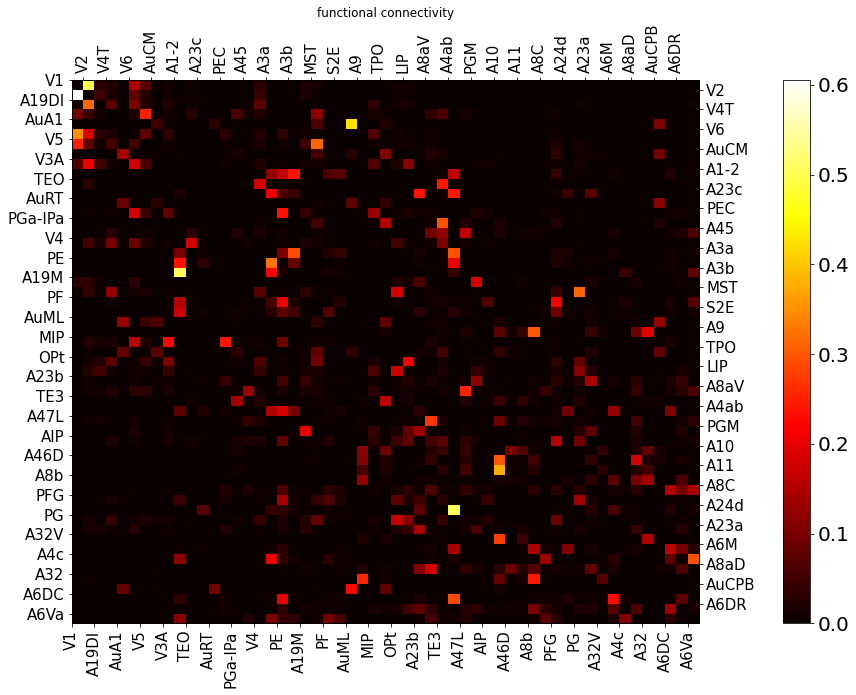

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15, 10), facecolor=(1, 1, 1))
tc.plot_func_connectivity(p, p['fln_mat'].copy(), fig, ax)
# TCP.save_fig('Figures/5A_a')

## FC with gradient

G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2132: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


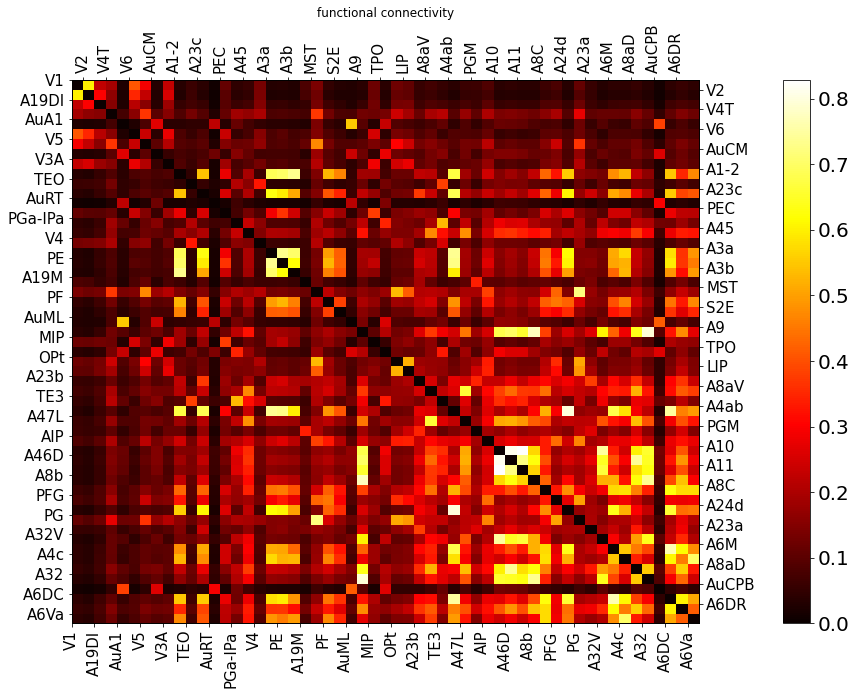

In [5]:
W_EI = tc.generate_W_EI_shuffle_fln(p.copy(),p['fln_mat'].copy())
corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p, W_EI)
FC_model = corr_mat_E - np.diag(np.diag(corr_mat_E))
fig, ax = plt.subplots(1,1,figsize=(15, 10), facecolor=(1, 1, 1))
tc.plot_func_connectivity(p, FC_model, fig, ax)
# TCP.save_fig('Figures/5A_b')

## FC without gradient

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
ZERO_HIER 

CONSENSUS_CASE=0
No STRONG GBA


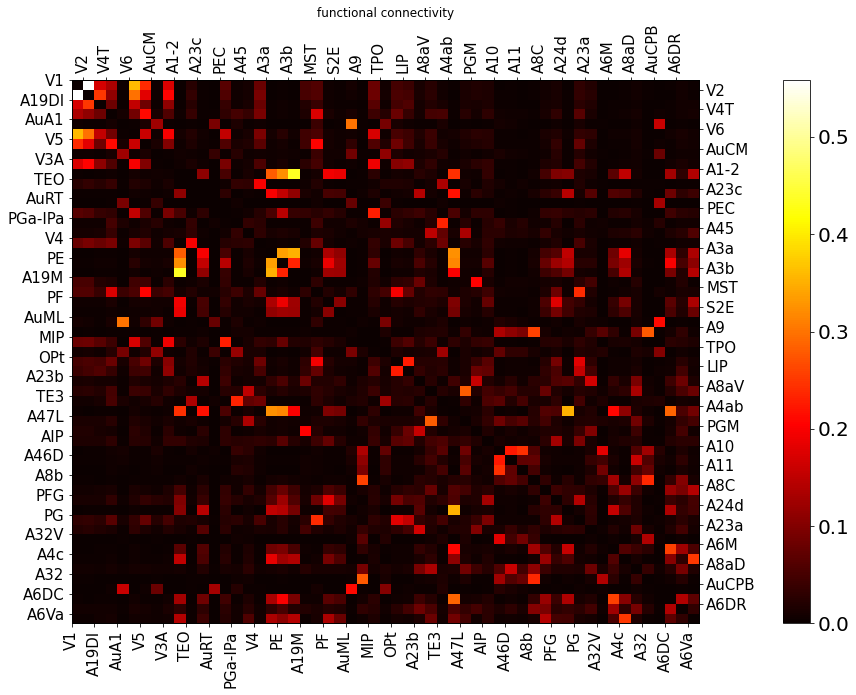

In [6]:
p_nog = pf.load_data(datafile)
p_nog,W_nog = pf.genetate_net_connectivity(p,ZERO_HIER = 1, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
W_EI_nog = tc.generate_W_EI_shuffle_fln(p_nog.copy(),p_nog['fln_mat'].copy())
corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_nog, W_EI_nog)
FC_model_nog = corr_mat_E - np.diag(np.diag(corr_mat_E))
fig, ax = plt.subplots(1,1,figsize=(15, 10), facecolor=(1, 1, 1))
tc.plot_func_connectivity(p, FC_model_nog, fig, ax)
# TCP.save_fig('Figures/5A_c')

# Fig B: Influence of criticality on FC versus SC (by changing coupling strength)

In [7]:
# Compute the disimilarity between FC and SC
def dissimilar_FC_SC_Cos(p, FC):
    FLN_model = p['fln_mat'].copy()
    FLN_sym = (FLN_model + FLN_model.T) / 2
    dist_lst = np.zeros(p['n_area'])
    for i in range(p['n_area']):
        # dist_lst[i] = np.corrcoef(FC_simu_full[i,:], FLN_sym[i,:])[0,1]
        dist_lst[i] = np.corrcoef(FC[i,:], FLN_sym[i,:])[0,1]
        # dist_lst[i] = np.sum(np.abs(FC_model[i,:] - FLN_sym[i,:]))
    return np.degrees(np.arccos(np.mean(dist_lst)))

def dissimilar_FC_SC(p, FC):
    FLN_model = p['fln_mat'].copy()
    FLN_sym = (FLN_model + FLN_model.T) / 2
    dist_lst = np.zeros(p['n_area'])
    dist_lst = np.corrcoef(FC.flatten(), FLN_sym.flatten())[0,1]
        # dist_lst[i] = np.sum(np.abs(FC_model[i,:] - FLN_sym[i,:]))
    return 1 - dist_lst

### Global Coupling 

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
ZERO_HIER 

CONSENSUS_CASE=0
No STRONG GBA


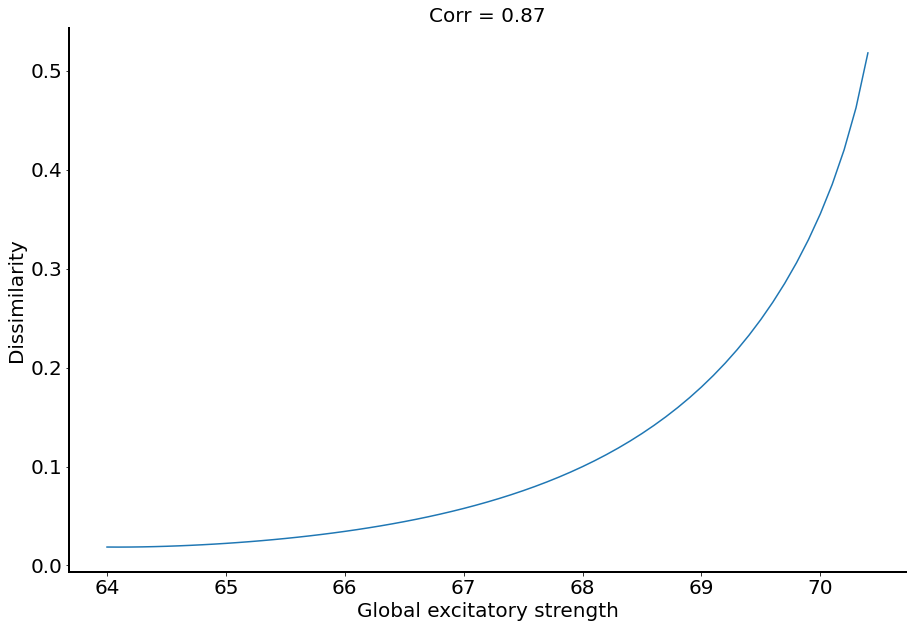

In [8]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
muEE_lst = np.arange(64, 70.5, 0.1) # np.array([55]) 
dis_lst = 0 * muEE_lst
for i in range(len(muEE_lst)):
    p_t['muEE'] = muEE_lst[i]
    W_EI_t = tc.generate_W_EI_shuffle_fln(p_t.copy(),p_t['fln_mat'].copy())
    corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_t, W_EI_t)
    FC_model_t = corr_mat_E - np.diag(np.diag(corr_mat_E))
    dis_lst[i] = dissimilar_FC_SC(p_t, np.abs(FC_model_t))
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(muEE_lst, dis_lst, '*-')
# fig, ax = plt.subplots(1,1,figsize=(15, 10))
# tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
fig = TCP.plot_line_curve(dis_lst, muEE_lst, p_t['areas'],
                          x_label='Global excitatory strength', y_label='Dissimilarity')
# TCP.save_fig('Figures/5B')

### Local Coupling

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
IDENTICAL_HIER 

CONSENSUS_CASE=0
No STRONG GBA


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2127: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


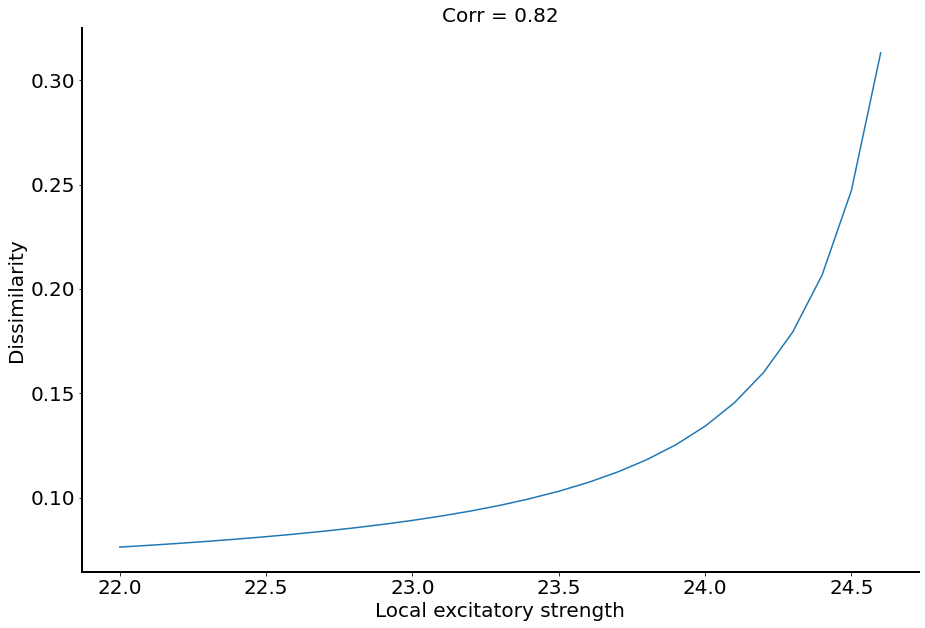

In [9]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=1,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
wEE_lst = np.arange(22, 24.7, 0.1)
dis_lst = 0 * wEE_lst
for i in range(len(wEE_lst)):
    p_t['wEE'] = wEE_lst[i]
    W_EI_t = tc.generate_W_EI_shuffle_fln(p_t.copy(),p_t['fln_mat'].copy())
    corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_t, W_EI_t)
    FC_model_t = corr_mat_E - np.diag(np.diag(corr_mat_E))
    dis_lst[i] = dissimilar_FC_SC(p_t, FC_model_t)
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(wEE_lst, dis_lst, '*-')
# fig, ax = plt.subplots(1,1,figsize=(15, 10))
# tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
fig = TCP.plot_line_curve(dis_lst, wEE_lst, p_t['areas'],
                          x_label='Local excitatory strength', y_label='Dissimilarity')
# TCP.save_fig('Figures/5B_Supp')

# Fig C: Influence of criticality on FC versus SC (by changing gradient)

## Gradient starting from 0 to full 

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2127: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


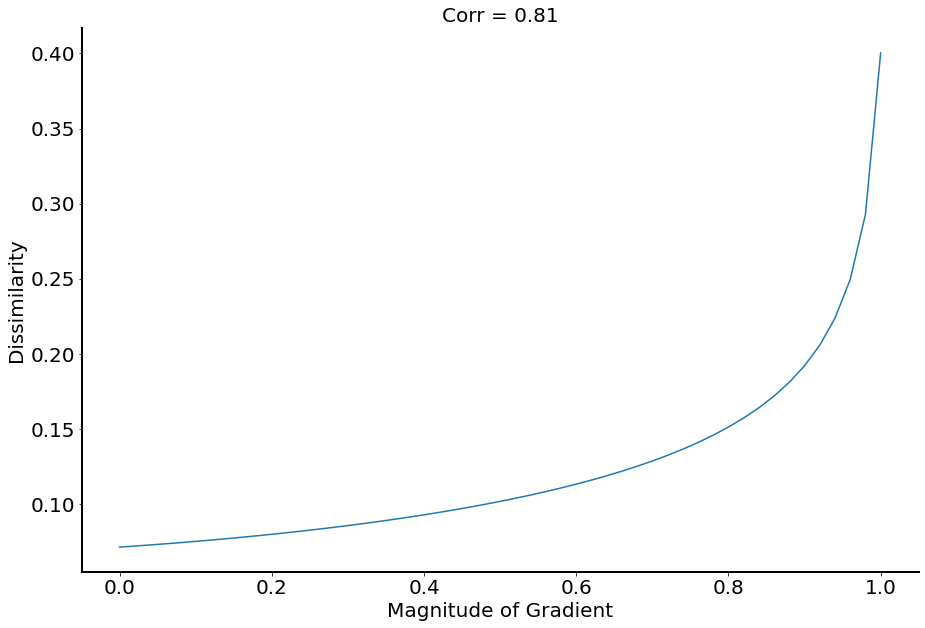

In [10]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
hier_vals_ori = p_t['hier_vals'] + 0.0
lamb_lst = np.linspace(0, 1, 51)
# lamb_lst = np.array([0])
dis_lst = 0 * lamb_lst
for i in range(len(lamb_lst)):
    lamb = lamb_lst[i]
    hier_vals_t = lamb * hier_vals_ori
    p_tt = p_t.copy(); p_tt['hier_vals'] = hier_vals_t; p_tt['hier_vals_inh'] = hier_vals_t
    W_EI_tt = tc.generate_W_EI_shuffle_fln(p_tt.copy(),p_tt['fln_mat'].copy())
    corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_tt, W_EI_tt)
    FC_model_t = corr_mat_E - np.diag(np.diag(corr_mat_E))
    dis_lst[i] = dissimilar_FC_SC(p_tt, FC_model_t)
#     fig, ax = plt.subplots(1,1,figsize=(15, 10))
#     tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(lamb_lst, dis_lst, '*-')
fig = TCP.plot_line_curve(dis_lst, lamb_lst, p_t['areas'],
                          x_label='Magnitude of Gradient', y_label='Dissimilarity')
# TCP.save_fig('Figures/5C')

In [11]:
dis_lst_full = dis_lst;

## Interpolation between gradient and all 1 vector

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2127: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


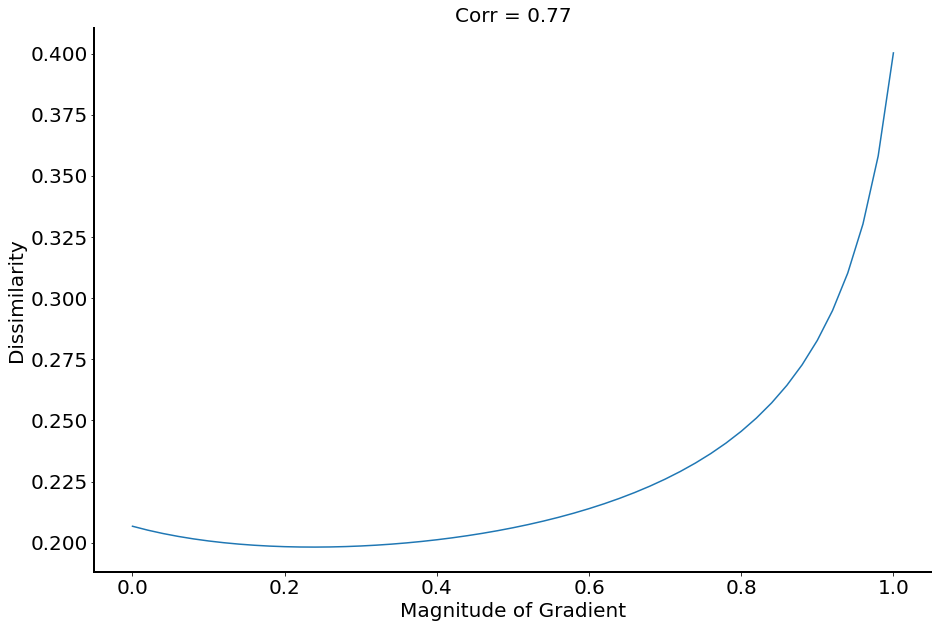

In [12]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
hier_vals_ori = p_t['hier_vals'] + 0.0
lamb_lst = np.linspace(0, 1, 51)
# lamb_lst = np.array([0])
dis_lst = 0 * lamb_lst
for i in range(len(lamb_lst)):
    lamb = lamb_lst[i]
    hier_vals_t = (1-lamb) * np.ones(len(p['areas'])) * np.mean(hier_vals_ori) + lamb * hier_vals_ori
    p_tt = p_t.copy(); p_tt['hier_vals'] = hier_vals_t; p_tt['hier_vals_inh'] = hier_vals_t
    W_EI_tt = tc.generate_W_EI_shuffle_fln(p_tt.copy(),p_tt['fln_mat'].copy())
    corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_tt, W_EI_tt)
    FC_model_t = corr_mat_E - np.diag(np.diag(corr_mat_E))
    dis_lst[i] = dissimilar_FC_SC(p_tt, FC_model_t)
#     fig, ax = plt.subplots(1,1,figsize=(15, 10))
#     tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(lamb_lst, dis_lst, '*-')
fig = TCP.plot_line_curve(dis_lst, lamb_lst, p_t['areas'],
                          x_label='Magnitude of Gradient', y_label='Dissimilarity')
# TCP.save_fig('Figures/5C_Supp')

In [13]:
dis_lst_interp = dis_lst

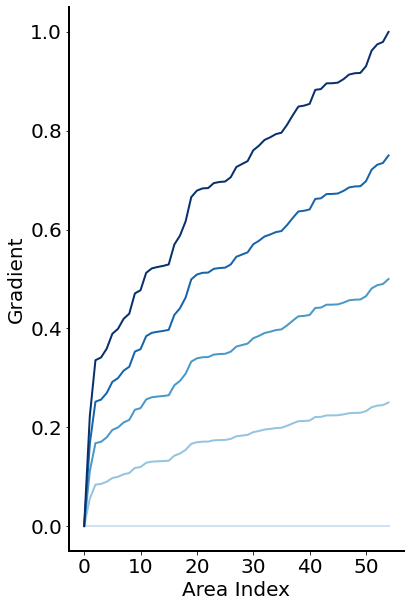

In [14]:
hier_vals_sorted = np.sort(hier_vals_ori)

fig, ax = plt.subplots(figsize=(6,10), facecolor=(1, 1, 1))
colormap = plt.cm.Blues

N = 5
lamb_lst = np.linspace(0, 1, N)
# Iterate over the lines to plot them with varying colors
for i in range(N):
    # Calculate color intensity based on position
    color_intensity = (i + 1) / N
    color = colormap(color_intensity)
    lamb = lamb_lst[i]
    hier_vals_lamb = lamb * hier_vals_sorted
    # hier_vals_lamb = (1-lamb) * np.ones(len(p['areas'])) * np.mean(hier_vals_sorted) + lamb * hier_vals_sorted
    # Plot each line with the respective color
    ax.plot(hier_vals_lamb, color=color, linewidth=2)

# Add title and labels as needed
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Area Index", fontsize=20)
plt.ylabel("Gradient", fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# TCP.save_fig('Figures/5C_New_illu_1')

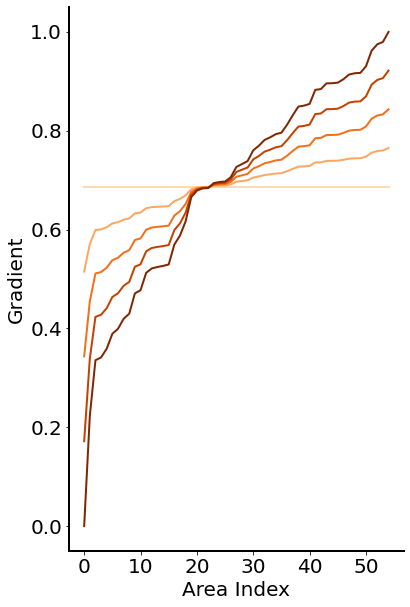

In [15]:
hier_vals_sorted = np.sort(hier_vals_ori)

fig, ax = plt.subplots(figsize=(6,10), facecolor=(1, 1, 1))
colormap = plt.cm.Oranges
N = 5
lamb_lst = np.linspace(0, 1, N)
# Iterate over the lines to plot them with varying colors
for i in range(N):
    # Calculate color intensity based on position
    color_intensity = (i + 1) / N
    color = colormap(color_intensity)
    lamb = lamb_lst[i]
    # hier_vals_lamb = lamb * hier_vals_sorted
    hier_vals_lamb = (1-lamb) * np.ones(len(p['areas'])) * np.mean(hier_vals_sorted) + lamb * hier_vals_sorted
    # Plot each line with the respective color
    ax.plot(hier_vals_lamb, color=color, linewidth=2)

# Add title and labels as needed
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Area Index", fontsize=20)
plt.ylabel("Gradient", fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

TCP.save_fig('Figures/5C_New_illu_2')

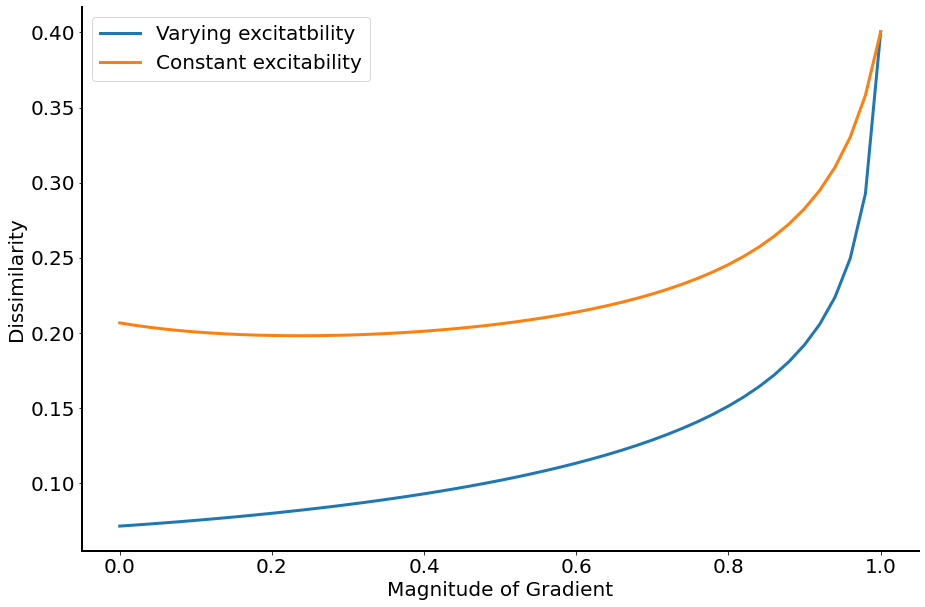

In [19]:
lamb_lst = np.linspace(0, 1, 51)
fig, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))
scatter1 = plt.plot(lamb_lst, dis_lst_full, linewidth=3)
scatter2 = plt.plot(lamb_lst, dis_lst_interp, linewidth=3)
# scatter2 = ax.plot(dis_lst, lamb_lst_interp, '-', ms=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Magnitude of Gradient', fontsize=20)
plt.ylabel('Dissimilarity', fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.legend(["Varying excitatbility", "Constant excitability"], fontsize=20)

# TCP.save_fig('Figures/5C_New')

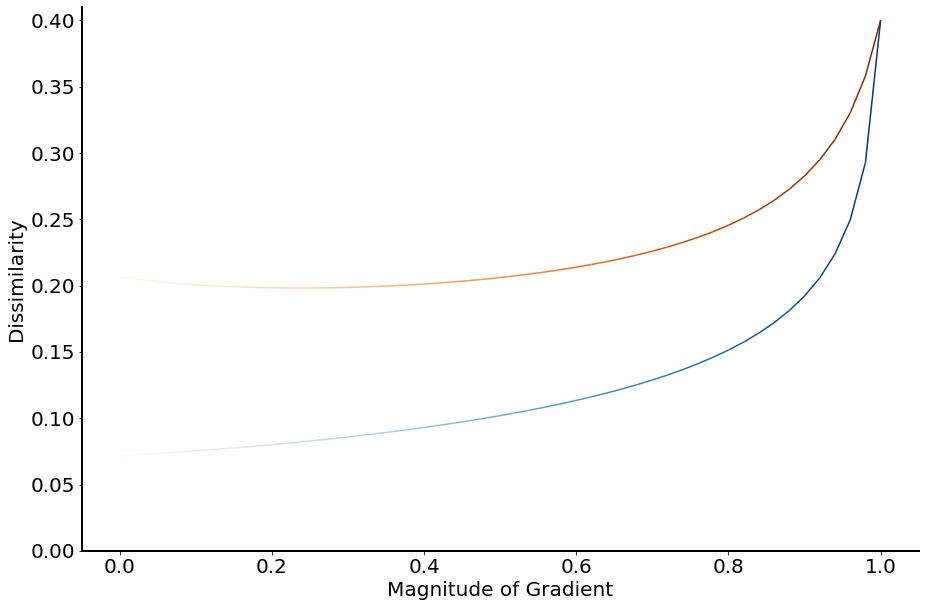

In [32]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))
cmap = plt.get_cmap('Blues')

points = np.array([lamb_lst, dis_lst_full]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1))
lc.set_array(lamb_lst)
ax.add_collection(lc)


cmap = plt.get_cmap('Oranges')
points = np.array([lamb_lst, dis_lst_interp]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1))
lc.set_array(lamb_lst)
ax.add_collection(lc)

# scatter2 = ax.plot(dis_lst, lamb_lst_interp, '-', ms=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Magnitude of Gradient', fontsize=20)
plt.ylabel('Dissimilarity', fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.xlim([-0.05, 1.05])
plt.ylim([0, 0.41])

TCP.save_fig('Figures/5C_New_V2')

# Fig D: Correlation between FC and SC (for each area) decreases with the area's hi 

In [8]:
from scipy import stats

### With Gradient

-0.3159586451013768
0.40571280386686354


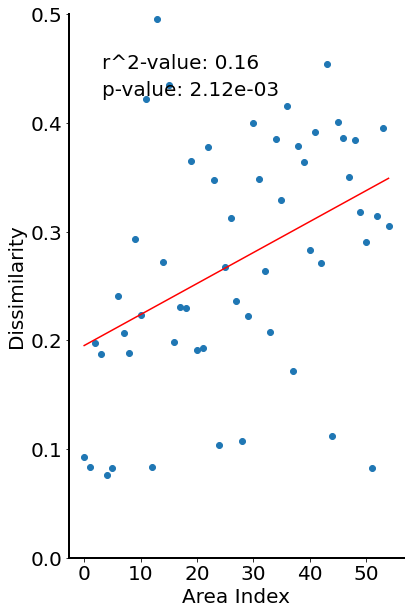

In [9]:
FLN_model = p['fln_mat'].copy()
FLN_sym = (FLN_model + FLN_model.T) / 2
dist_lst = np.zeros(p['n_area'])
for i in range(p['n_area']):
    # dist_lst[i] = np.corrcoef(FC_simu_full[i,:], FLN_sym[i,:])[0,1]
    dist_lst[i] = 1- np.corrcoef(FC_model[i,:], FLN_sym[i,:])[0,1]
    # dist_lst[i] = np.sum(np.abs(FC_model[i,:] - FLN_sym[i,:]))
# print(np.mean(np.power(dist_lst,2)))
theta_lst = np.degrees(np.arccos(dist_lst))
# plt.scatter(p['hier_vals'], theta_lst)
print(np.corrcoef(p['hier_vals'], theta_lst)[0,1])
# Also show this figure in region wise?

# fig = TCP.plot_tau_feature(dist_lst, np.arange(p['n_area']), [],
#                     x_label='Area Index', y_label='Dissimilarity')
fig = TCP.plot_tau_feature(dist_lst, np.arange(p['n_area']), p['areas'],
                    x_label='Area Index', y_label='Dissimilarity',annotate_flag=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(p['n_area']),dist_lst)
print(r_value)
# plt.plot(p['hier_vals'], slope*p['hier_vals'] + intercept, color='red')  # The line equation: y = mx + b

# # Print the p-value on the figure
# plt.text(0.1, 0.9, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=20)
# plt.ylim([20, 60])
fig.set_figwidth(6)
plt.ylim([0, 0.5])
TCP.save_fig('Figures/5D_a')
# increasing range of y-axis
# compare with the critcality created by increasing coupling strength

In [10]:
df = pd.read_excel('Data/Marmoset_Model/Area_map_Marmoset_W_Rosa.xlsx')
region = df["Region"]
for area_k in ['dLPFC', 'mPFC', 'vLPFC']:
    region[region == area_k] = 'PFC'
df["Region"] = region

C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/633601476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region == area_k] = 'PFC'


In [11]:
number_list = [0, 1, 2, 3, 4, 5, 6, 7]
network_name_list = ["Unknown", "Visual", "SomMot", "DorsAtt", "Salience", "Limbic", "FPN", "Default"]
mapping_dict = dict(zip(number_list, network_name_list))

# 使用apply方法将映射应用到数据框
df['network'] = df['Networks_ID'].apply(lambda x: mapping_dict[x])

In [12]:
# 创建一个字典来映射新数据
data_dict = dict(zip(p['areas'], dist_lst))

# 使用map方法添加新列
df['dist'] = df['Area'].map(data_dict)

In [13]:
# 创建一个字典来映射新数据
data_dict = dict(zip(p['areas'], p['hier_vals']))

# 使用map方法添加新列
df['hier'] = df['Area'].map(data_dict)

In [14]:
df.columns

Index(['Area', 'Area (Macaque)', 'Networks_ID', 'Assignment', 'Region',
       'network', 'dist', 'hier'],
      dtype='object')

In [15]:
df[df['network'] == "Salience"][["Area", "Area (Macaque)", "Region", "network", "dist", "hier"]]

,Area,Area (Macaque),Region,network,dist,hier
11,A23c,23,PmACC,Salience,0.421741,0.512471
23,S2E,SII,Somatosensory,Salience,0.347598,0.705860
30,A23b,23,PmACC,Salience,0.400070,0.665676
45,A23a,23,PmACC,Salience,0.400813,0.786674


[Text(0, 0, 'Visual'),
 Text(1, 0, 'Auditory'),
 Text(2, 0, 'Somatosensory'),
 Text(3, 0, 'Posterior Parietal'),
 Text(4, 0, 'liTemporal'),
 Text(5, 0, 'Motor/Premotor'),
 Text(6, 0, 'PFC')]

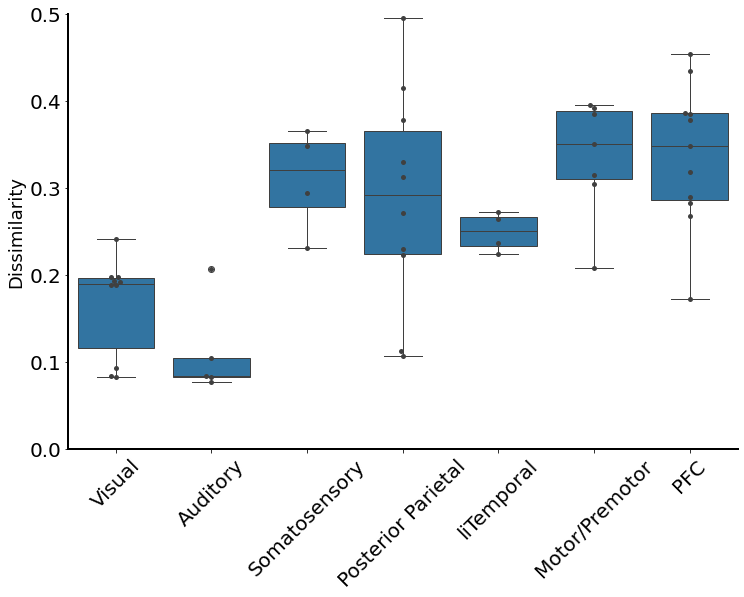

In [16]:
hue_order = ['Visual', 'Auditory', 'Somatosensory', 'Posterior Parietal', 'liTemporal',  'Motor/Premotor', 'PFC']
fig10, ax = plt.subplots(figsize=(12,8), facecolor=(1, 1, 1))
sns.boxplot(x="Region", y="dist", data=df, order=hue_order)
sns.swarmplot(x="Region", y="dist", data=df, order=hue_order, color=".25")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Dissimilarity', fontsize=18)
plt.xlabel('')
plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.set_xticks(np.arange(len(hue_order)))
ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

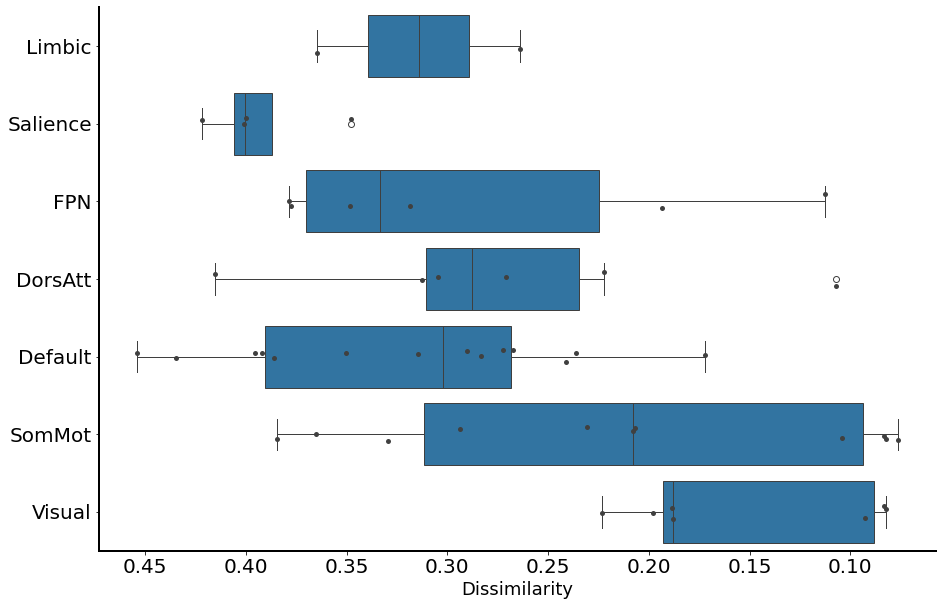

In [17]:
hue_order = ["Visual", "SomMot", "Default", "DorsAtt", "FPN", "Salience", "Limbic"]
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Human_Order')

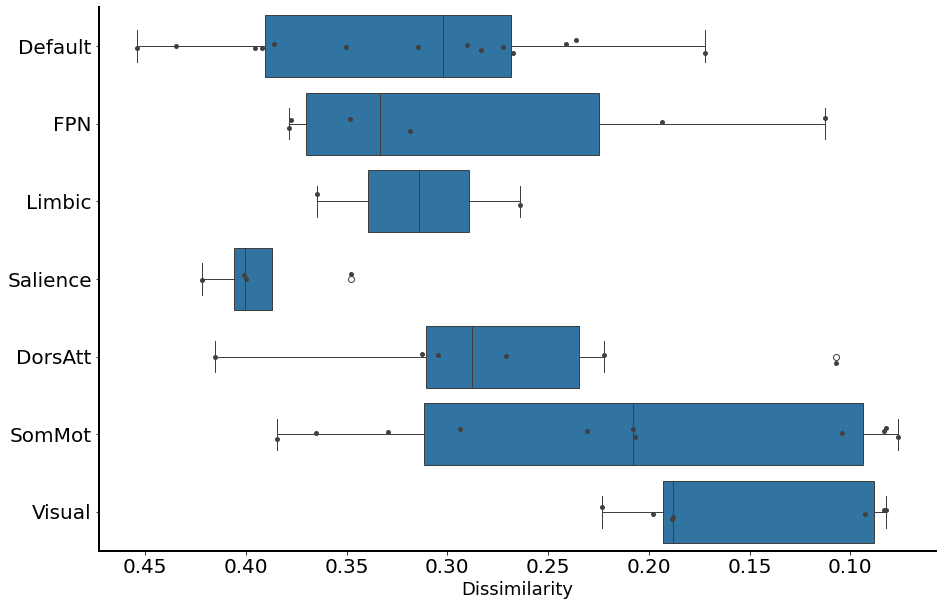

In [18]:
hue_order = ["Visual", "SomMot", "DorsAtt",  "Salience", "Limbic", "FPN", "Default"]
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Macaque_Order')

In [19]:
# Sort by Dissimilarity
grouped_mean = df.groupby('network')['dist'].mean().reset_index()
sorted_grouped_mean = grouped_mean.sort_values(by='dist', ascending=True).reset_index(drop=True)

print(sorted_grouped_mean)
print(sorted_grouped_mean['network'].tolist())

    network      dist
0    Visual  0.150837
1    SomMot  0.214942
2   DorsAtt  0.272164
3       FPN  0.288001
4   Unknown  0.299690
5    Limbic  0.314276
6   Default  0.320685
7  Salience  0.392555
['Visual', 'SomMot', 'DorsAtt', 'FPN', 'Unknown', 'Limbic', 'Default', 'Salience']


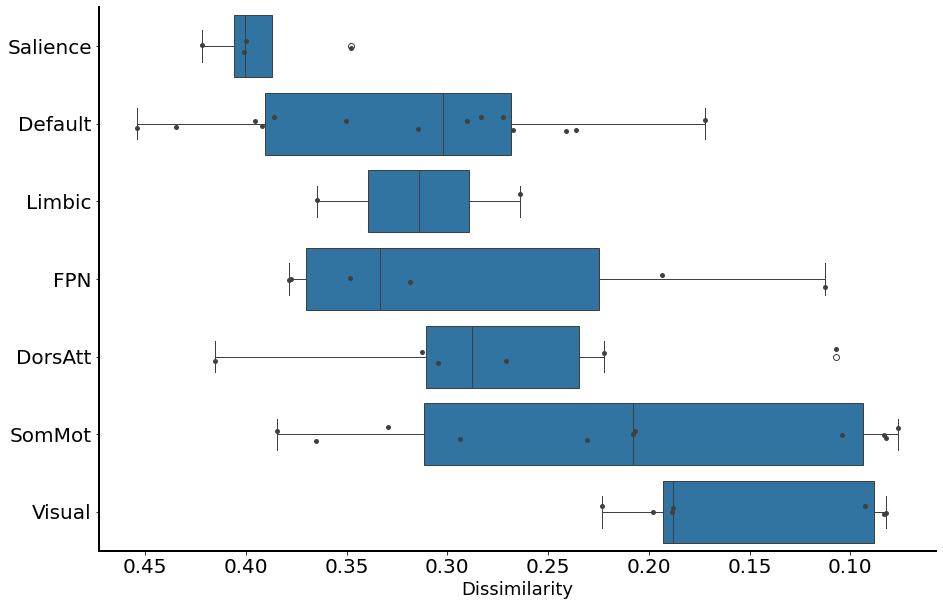

In [20]:
hue_order = ['Visual', 'SomMot', 'DorsAtt', 'FPN', 'Limbic', 'Default', 'Salience']
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Dist_Order')

In [21]:
# Sort by Hierarchy
grouped_mean = df.groupby('network')['hier'].mean().reset_index()
sorted_grouped_mean = grouped_mean.sort_values(by='hier', ascending=True).reset_index(drop=True)

print(sorted_grouped_mean)
print(sorted_grouped_mean['network'].tolist())

    network      hier
0    Visual  0.352214
1   Unknown  0.575516
2    SomMot  0.653836
3  Salience  0.667670
4   DorsAtt  0.786481
5   Default  0.787541
6    Limbic  0.814984
7       FPN  0.865809
['Visual', 'Unknown', 'SomMot', 'Salience', 'DorsAtt', 'Default', 'Limbic', 'FPN']


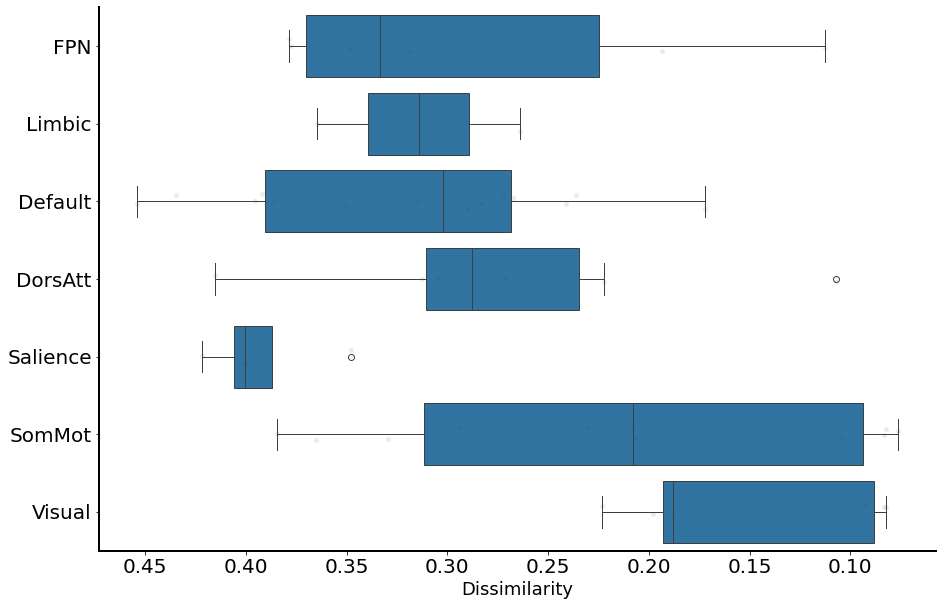

In [22]:
hue_order = ['Visual', 'SomMot', 'Salience', 'DorsAtt', 'Default', 'Limbic', 'FPN']
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.stripplot(y="network", x="dist", data=df, order=hue_order, color=".25", alpha=0.1)
sns.boxplot(y="network", x="dist", data=df, order=hue_order, whis=1.5, orient='h')

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Hier_Order')

C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/4064143521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())
C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/4064143521.py:5: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.stripplot(data=df, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())


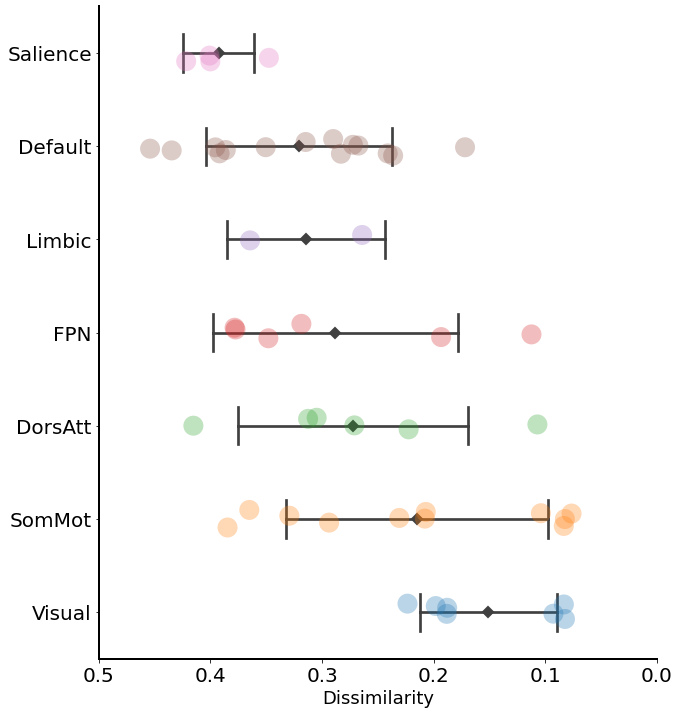

In [32]:
hue_order = ['Visual', 'SomMot', 'DorsAtt', 'FPN', 'Limbic', 'Default', 'Salience']

fig10, ax = plt.subplots(figsize=(10,12), facecolor=(1, 1, 1))

sns.stripplot(data=df, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())
sns.pointplot(data=df, x="dist", y="network", errorbar=('sd',1), order=hue_order,
              capsize=.4, color="0.25", linestyles="None", markers="D")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xlim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Dist_Order_std')

### Zero Gradient & Criticality

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
IDENTICAL_HIER 

CONSENSUS_CASE=0
No STRONG GBA
-0.0047889013227126465
3.842785692940786e-15
0.40571280386686354 0.002118642049608198


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2132: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


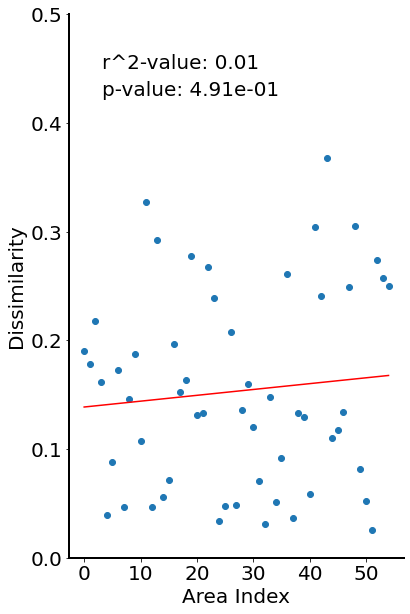

In [33]:
p_nog = pf.load_data(datafile)
p_nog,W_nog = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=1,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)
# p_nog['muEE'] += 0.385
# p_nog['eta'] += 8e-3
# p_nog['eta_local'] += 8e-3
W_EI_nog = tc.generate_W_EI_shuffle_fln(p_nog.copy(),p_nog['fln_mat'].copy())
eigVals_nog, eigVecs_nog = np.linalg.eig(W_EI_nog)
print(np.max(np.real(eigVals_nog)))
corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_nog, W_EI_nog)
FC_model_nog = corr_mat_E - np.diag(np.diag(corr_mat_E))
dist_lst_nog = np.zeros(p_nog['n_area'])
for i in range(p_nog['n_area']):
    # dist_lst[i] = np.corrcoef(FC_simu_full[i,:], FLN_sym[i,:])[0,1]
    dist_lst_nog[i] = 1 - np.corrcoef(FC_model_nog[i,:], FLN_sym[i,:])[0,1]
    # dist_lst[i] = np.sum(np.abs(FC_model[i,:] - FLN_sym[i,:]))
# print(np.mean(np.power(dist_lst,2)))
theta_lst = np.degrees(np.arccos(dist_lst_nog))
# plt.scatter(p['hier_vals'], theta_lst)
print(np.corrcoef(p_nog['hier_vals'], theta_lst)[0,1])
# Also show this figure in region wise?
# fig = TCP.plot_tau_feature(theta_lst, p['hier_vals'], [],
#                     x_label='Gradient of Embedding', y_label='Theta')
fig = TCP.plot_tau_feature(dist_lst_nog, np.arange(p['n_area']), p['areas'],
                    x_label='Area Index', y_label='Dissimilarity', annotate_flag=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(p['n_area']),dist_lst)
print(r_value, p_value)
# plt.plot(p['hier_vals'], slope*p['hier_vals'] + intercept, color='red')  # The line equation: y = mx + b

# # Print the p-value on the figure
# plt.text(0.1, 0.9, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=20)
fig.set_figwidth(6)
plt.ylim([0, 0.5])
TCP.save_fig('Figures/5D_b')

In [34]:
df_nog = pd.read_excel('Data/Marmoset_Model/Area_map_Marmoset_W_Rosa.xlsx')
region = df_nog["Region"]
for area_k in ['dLPFC', 'mPFC', 'vLPFC']:
    region[region == area_k] = 'PFC'
df_nog["Region"] = region

C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/4112657053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region == area_k] = 'PFC'


In [35]:
number_list = [0, 1, 2, 3, 4, 5, 6, 7]
network_name_list = ["Unknown", "Visual", "SomMot", "DorsAtt", "Salience", "Limbic", "FPN", "Default"]
mapping_dict = dict(zip(number_list, network_name_list))

# 使用apply方法将映射应用到数据框
df_nog['network'] = df_nog['Networks_ID'].apply(lambda x: mapping_dict[x])

In [36]:
# 创建一个字典来映射新数据
data_dict = dict(zip(p['areas'], dist_lst_nog))
# 使用map方法添加新列
df_nog['dist'] = df_nog['Area'].map(data_dict)

[Text(0, 0, 'Visual'),
 Text(1, 0, 'Auditory'),
 Text(2, 0, 'Somatosensory'),
 Text(3, 0, 'Posterior Parietal'),
 Text(4, 0, 'liTemporal'),
 Text(5, 0, 'Motor/Premotor'),
 Text(6, 0, 'PFC')]

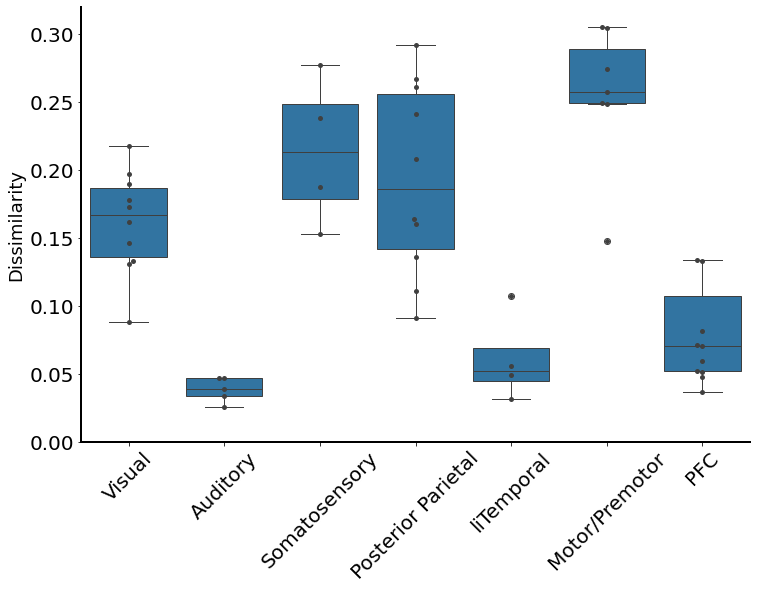

In [37]:
hue_order = ['Visual', 'Auditory', 'Somatosensory', 'Posterior Parietal', 'liTemporal',  'Motor/Premotor', 'PFC']
fig10, ax = plt.subplots(figsize=(12,8), facecolor=(1, 1, 1))
sns.boxplot(x="Region", y="dist", data=df_nog, order=hue_order)
sns.swarmplot(x="Region", y="dist", data=df_nog, order=hue_order, color=".25")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Dissimilarity', fontsize=18)
plt.xlabel('')
plt.ylim([0, 0.32])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.set_xticks(np.arange(len(hue_order)))
ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

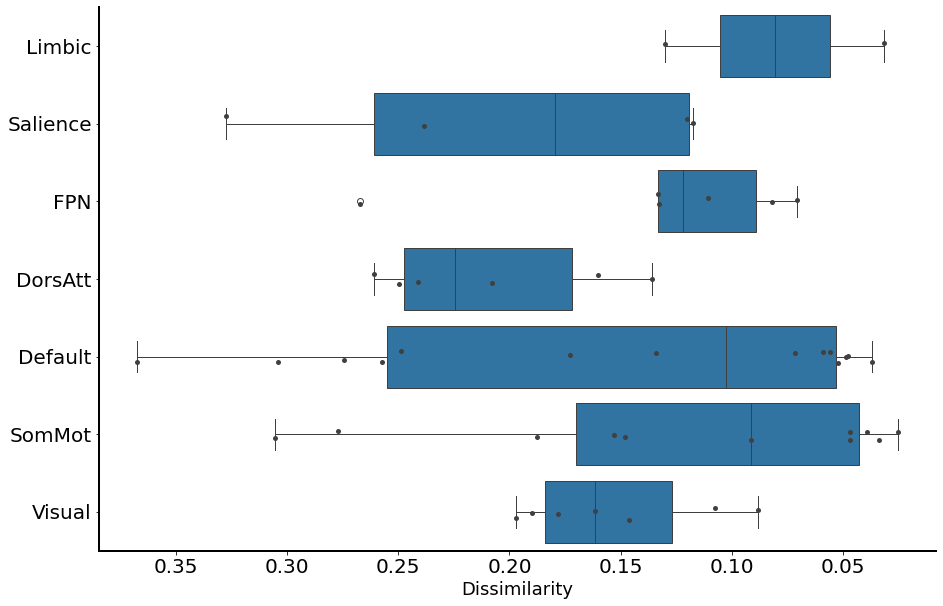

In [38]:
hue_order = ["Visual", "SomMot", "Default", "DorsAtt", "FPN", "Salience", "Limbic"]
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df_nog, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df_nog, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Human_Order_nog')

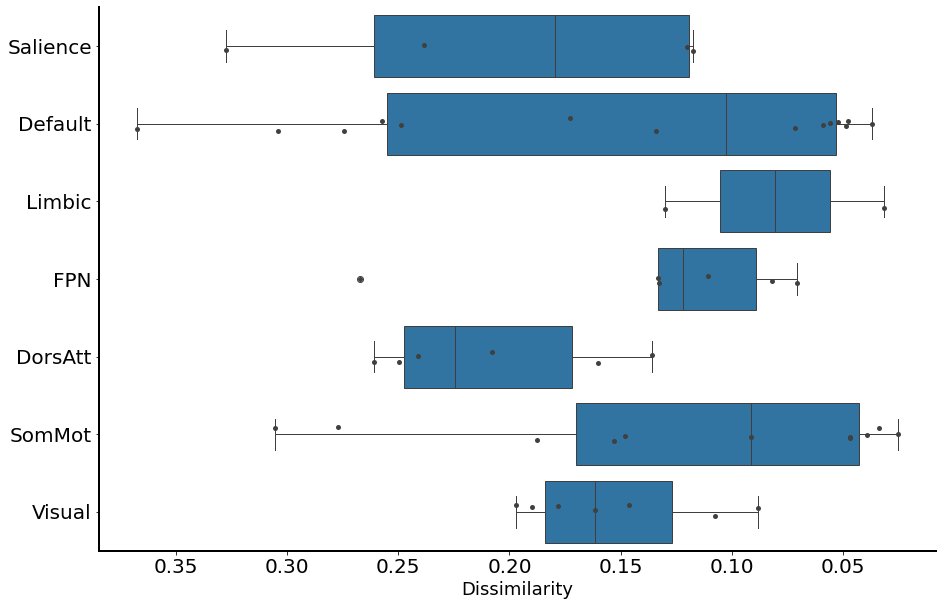

In [39]:
hue_order = ['Visual', 'SomMot', 'DorsAtt', 'FPN', 'Limbic', 'Default', 'Salience']
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df_nog, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df_nog, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Dist_Order_nog')

C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/2459289104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_nog, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())
C:\Users\ligua\AppData\Local\Temp/ipykernel_10996/2459289104.py:5: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.stripplot(data=df_nog, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())


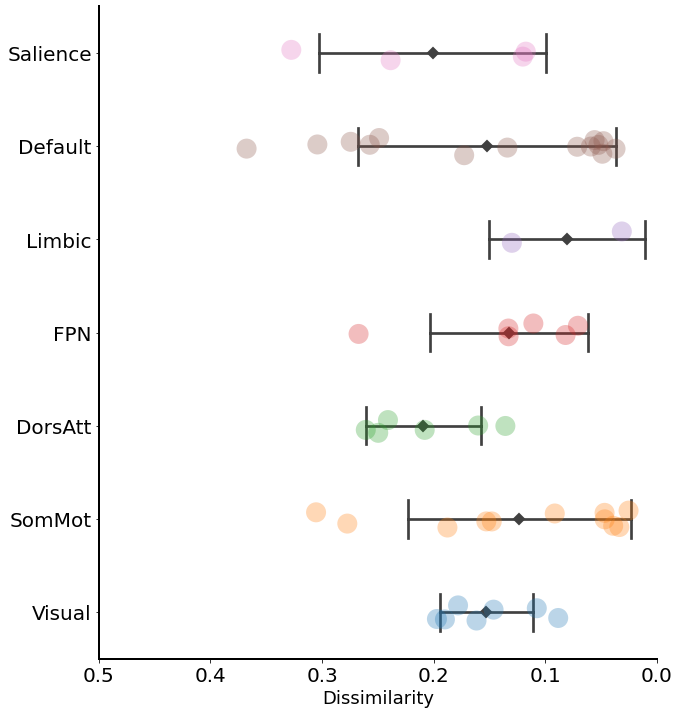

In [43]:
hue_order = ['Visual', 'SomMot', 'DorsAtt', 'FPN', 'Limbic', 'Default', 'Salience']

fig10, ax = plt.subplots(figsize=(10,12), facecolor=(1, 1, 1))

sns.stripplot(data=df_nog, x="dist", y="network", dodge=False, alpha=0.3,  order=hue_order, size=20, palette=sns.color_palette())
sns.pointplot(data=df_nog, x="dist", y="network", errorbar=('sd',1), order=hue_order,
              capsize=.4, color="0.25", linestyles="None", markers="D")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xlim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Dist_Order_nog_std')

In [48]:
df_selected = df[['Area', 'dist']]
df_nog_selected = df_nog[['Area', 'dist']]

# 合并两个DataFrame
df_merged = pd.merge(df_selected, df_nog_selected, on='Area', suffixes=('_control', '_no_gradient'))

# 重命名列
df_merged.columns = ['Area', 'dist_control', 'dist_no_gradient']

In [49]:
# 将合并后的DataFrame保存到CSV文件
df_merged.to_csv('data_plot_SC_FC_all_areas.csv', index=False)


## Local gradient only

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
LONG_RANGE_IDENTICAL_HIERARCHY 

-0.0004963266445567882
8.862273637844711e-16
0.40571280386686354 0.002118642049608198


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\time_constant_shuffle_FLN.py:2132: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[i,j])/np.sqrt(Cov_mat[i,i]*Cov_mat[j,j])


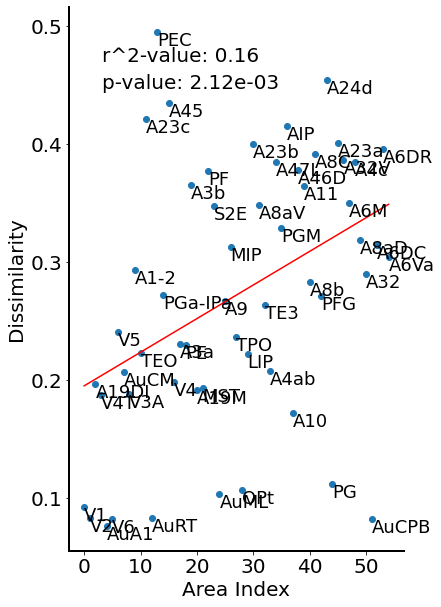

In [31]:
p_locg = pf.load_data(datafile)
p_locg,W_locg = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,LONG_RANGE_IDENTICAL_HIERARCHY=1,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)
p_locg['eta'] -= 6e-3
p_locg['eta_local'] -= 6e-3
W_EI_locg = tc.generate_W_EI_shuffle_fln(p_locg.copy(),p_locg['fln_mat'].copy(), LONG_RANGE_IDENTICAL_HIERARCHY=1)
eigVals_locg, eigVecs_locg = np.linalg.eig(W_EI_locg)
print(np.max(np.real(eigVals_locg)))
corr_mat_E, cov_mat = tc.generate_func_connectivity_WEI(p_locg, W_EI_locg)
FC_model_locg = corr_mat_E - np.diag(np.diag(corr_mat_E))
dist_lst_locg = np.zeros(p_nog['n_area'])
for i in range(p_nog['n_area']):
    # dist_lst[i] = np.corrcoef(FC_simu_full[i,:], FLN_sym[i,:])[0,1]
    dist_lst_locg[i] = 1 - np.corrcoef(FC_model_locg[i,:], FLN_sym[i,:])[0,1]
    # dist_lst[i] = np.sum(np.abs(FC_model[i,:] - FLN_sym[i,:]))
# print(np.mean(np.power(dist_lst,2)))
theta_lst = np.degrees(np.arccos(dist_lst_locg))
# plt.scatter(p['hier_vals'], theta_lst)
print(np.corrcoef(p_nog['hier_vals'], theta_lst)[0,1])
# Also show this figure in region wise?
# fig = TCP.plot_tau_feature(theta_lst, p['hier_vals'], [],
#                     x_label='Gradient of Embedding', y_label='Theta')
fig = TCP.plot_tau_feature(dist_lst, np.arange(p['n_area']), p['areas'],
                    x_label='Area Index', y_label='Dissimilarity', annotate_flag=1)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(p['n_area']),dist_lst)
print(r_value, p_value)
# plt.plot(p['hier_vals'], slope*p['hier_vals'] + intercept, color='red')  # The line equation: y = mx + b

# # Print the p-value on the figure
# plt.text(0.1, 0.9, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=20)
fig.set_figwidth(6)
# TCP.save_fig('Figures/5D_b')

In [32]:
df_locg = pd.read_excel('Data/Marmoset_Model/Area_map_Marmoset_W_Rosa.xlsx')
region = df_locg["Region"]
for area_k in ['dLPFC', 'mPFC', 'vLPFC']:
    region[region == area_k] = 'PFC'
df_nog["Region"] = region

C:\Users\ligua\AppData\Local\Temp/ipykernel_37384/1104218169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region == area_k] = 'PFC'


In [33]:
number_list = [0, 1, 2, 3, 4, 5, 6, 7]
network_name_list = ["Unknown", "Visual", "SomMot", "DorsAtt", "Salience", "Limbic", "FPN", "Default"]
mapping_dict = dict(zip(number_list, network_name_list))

# 使用apply方法将映射应用到数据框
df_locg['network'] = df_locg['Networks_ID'].apply(lambda x: mapping_dict[x])

In [34]:
# 创建一个字典来映射新数据
data_dict = dict(zip(p['areas'], dist_lst_locg))
# 使用map方法添加新列
df_locg['dist'] = df_locg['Area'].map(data_dict)

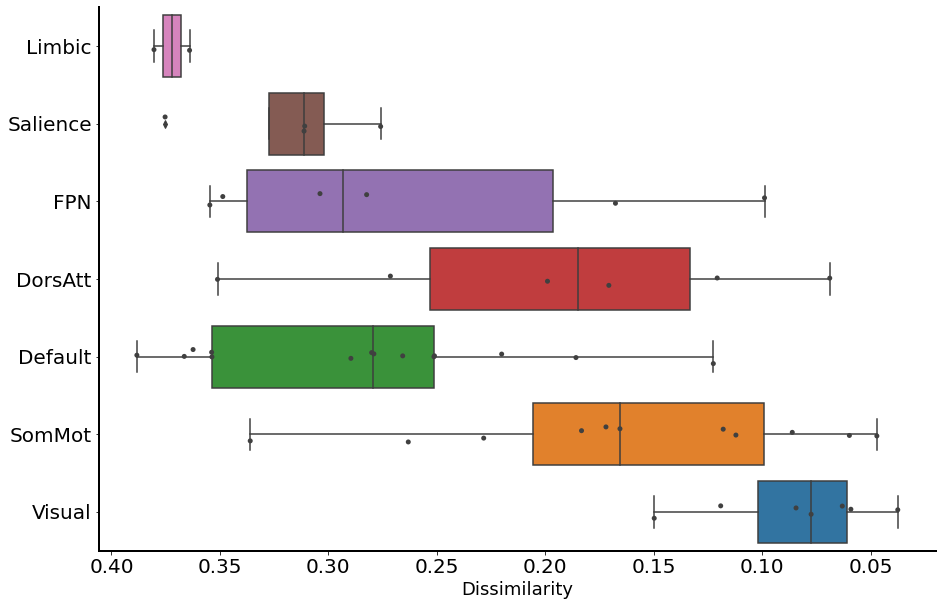

In [36]:
hue_order = ["Visual", "SomMot", "Default", "DorsAtt", "FPN", "Salience", "Limbic"]
# hue_order = [1, 2, 3, 4, 5, 6, 7]
fig10, ax = plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))

sns.boxplot(y="network", x="dist", data=df_locg, order=hue_order, whis=1.5, orient='h')
sns.stripplot(y="network", x="dist", data=df_locg, order=hue_order, color=".25")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dissimilarity', fontsize=18)
plt.ylabel('')
# plt.ylim([0, 0.5])
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.invert_xaxis()
ax.invert_yaxis()
# ax.set_xticks(np.arange(len(hue_order)))
# ax.set_xticklabels(hue_order,rotation=45,fontsize=20)

TCP.save_fig('Figures/Dist_7net_Human_Order_locg')

In [11]:
import pickle

def load_data(datafile):
    try:
        with open(datafile,'rb') as f:
            p = pickle.load(f)
    except UnicodeDecodeError:  # Python 3 compatibility
        with open(datafile,'rb') as f:
            p = pickle.load(f, encoding='latin1')
    
    print('dictionary keys=',p.keys())
    return p    
    
datafile='subgraph_data_marmoset.pkl'
data_mrm=load_data(datafile)

#==============================================================================
data_coordinate = pd.read_excel (r'mrm_coordinate.xlsx')
df_name = pd.DataFrame(data_coordinate, columns= ['area_name']).to_numpy()
name_list=list()

for i in np.arange(df_name.size):
    name_list.append(df_name[i][0])

area_order=np.zeros(df_name.size,dtype=np.int16)
for i in np.arange(df_name.size):
    area_order[i]=name_list.index(data_mrm['areas'][i])
print('area_order=',area_order)

df_x=pd.DataFrame(data_coordinate, columns= ['x']).to_numpy()
df_y=pd.DataFrame(data_coordinate, columns= ['y']).to_numpy()
df_z=pd.DataFrame(data_coordinate, columns= ['z']).to_numpy()

df_name=df_name[area_order]
df_x=df_x[area_order]
df_y=df_y[area_order]
df_z=df_z[area_order]

name_list=list()
for i in np.arange(df_name.size):
    name_list.append(df_name[i][0])

x_list=list()
y_list=list()
z_list=list()

for i in np.arange(df_name.size):
    x_list.append(df_x[i][0])
    y_list.append(df_y[i][0])
    z_list.append(df_z[i][0])
    

data_mrm['n_area']=df_name.size
data_mrm['eta']=0.618

fln_flat=data_mrm['fln_mat'].flatten()
fln_flat=fln_flat[fln_flat>0]
idx_fln=np.argsort(fln_flat)
fln_sort=np.sort(fln_flat)
# Control the density of connections
thr_fln=fln_sort[int(len(idx_fln)*0.75)]
print('thr_fln=',thr_fln)
print('num_strong_link=',len(fln_flat[fln_flat>thr_fln]))


w = np.empty([data_mrm['n_area'],data_mrm['n_area']])
paramuEEsp = 0.09
for i in range(data_mrm['n_area']):
    for j in range(i+1,data_mrm['n_area']):
        w[j,i] = (1 + data_mrm['eta'] * data_mrm['hier_vals'][j]) * paramuEEsp * data_mrm['fln_mat'][j,i]
        w[i,j] = (1 + data_mrm['eta'] * data_mrm['hier_vals'][i]) * paramuEEsp * data_mrm['fln_mat'][i,j]

dictionary keys= dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
area_order= [ 1  0 38 25 43 13 15 26 22 49 52 48 29 40 53 54 14 28 50 19 45 39 44 32
 16 42 41 30 24 23 10  6 34  7  5 21 33  2 35 51  3 31 27 20  9 18 36 12
 46 17 37 47 11  4  8]
thr_fln= 0.015209592068930907
num_strong_link= 463


In [12]:
def plot_weight_with_brain(w_SC, w_FC, area_id=0, name='Figures/6_Supp_FC_test'):

    par = np.ones(df_name.size,dtype=int)
    colormode=0
    alpha_level=0.4


    fig,(ax1, ax2)=plt.subplots(1, 2, figsize=(15,4))
    
    for i in range(data_mrm['n_area']):
        for j in range(i+1,data_mrm['n_area']):
            x = [x_list[i],x_list[j]]
            y = [y_list[i],y_list[j]]
            z = [z_list[i],z_list[j]]
#             if colormode==0:
#                 ax1.plot(y,z,color='red',linewidth = 25*(np.max(w_SC[j,i]+w_SC[i,j])),alpha=alpha_level)
#                 ax2.plot(y,z,color='blue',linewidth = 25*(np.max(w_FC[j,i]+w_FC[i,j])),alpha=alpha_level)
            if data_mrm['fln_mat'][j,i] > thr_fln or data_mrm['fln_mat'][i,j] > thr_fln:
                if colormode==0:
                    ax1.plot(y,z,color='red',linewidth = 25*(np.max(w[j,i]+w[i,j])+0.005),alpha=alpha_level)
                    ax2.plot(y,z,color='red',linewidth = 25*(np.max(w[j,i]+w[i,j])+0.005),alpha=alpha_level)
    
    w_SC_plot = w_SC[area_id,:].copy();
    w_SC_plot = w_SC_plot/np.max(w_SC_plot); w_SC_plot[area_id] = 1.5;

    ax1.scatter(y_list,z_list,s=200*w_SC_plot,color='k', zorder=3)    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    w_FC_plot = w_FC[area_id,:].copy();
    w_FC_plot =  w_FC_plot/np.max(w_FC_plot); w_FC_plot[area_id] = 1.5;
    ax2.scatter(y_list,z_list,s=200*w_FC_plot,color='k', zorder=3)    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # TCP.save_fig(name+'_{}'.format(k))
    
#     fig,ax=plt.subplots(figsize=(1,10))
#     f=ax.pcolormesh(np.expand_dims(w_plot[0,:],1),cmap='hot')
#     fig.colorbar(f,ax=ax,pad=0.1)
    
    # TCP.save_fig(name+'_{}_eigvec'.format(k))

In [13]:
def plot_weight_with_brain_ver2(w_SC, w_FC, area_id=0, name='Figures/6_Supp_FC_test'):

    par = np.ones(df_name.size,dtype=int)
    colormode=0
    alpha_level=0.4


    fig,(ax1, ax2)=plt.subplots(1, 2, figsize=(15,4))
    
    w_SC_plot = w_SC[area_id,:].copy();
    w_SC_plot = w_SC_plot/np.max(w_SC_plot); w_SC_plot[area_id] = 1.5;
    
    w_FC_plot = w_FC[area_id,:].copy();
    w_FC_plot =  w_FC_plot/np.max(w_FC_plot); w_FC_plot[area_id] = 1.5;
    
    for i in [area_id]:
        for j in range(data_mrm['n_area']):
            x = [x_list[i],x_list[j]]
            y = [y_list[i],y_list[j]]
            z = [z_list[i],z_list[j]]
            if colormode==0:
                ax1.plot(y,z,color='red',linewidth = 5*w_SC_plot[j],alpha=alpha_level)
                ax2.plot(y,z,color='blue',linewidth = 5*w_FC_plot[j],alpha=alpha_level)
#             if data_mrm['fln_mat'][j,i] > thr_fln or data_mrm['fln_mat'][i,j] > thr_fln:
#                 if colormode==0:
#                     ax1.plot(y,z,color='red',linewidth = 25*(np.max(w[j,i]+w[i,j])+0.005),alpha=alpha_level)
#                     ax2.plot(y,z,color='red',linewidth = 25*(np.max(w[j,i]+w[i,j])+0.005),alpha=alpha_level)
    


    ax1.scatter(y_list,z_list,s=10,color='k', zorder=3)    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    

    ax2.scatter(y_list,z_list,s=10,color='k', zorder=3)    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # TCP.save_fig(name+'_{}'.format(k))
    
#     fig,ax=plt.subplots(figsize=(1,10))
#     f=ax.pcolormesh(np.expand_dims(w_plot[0,:],1),cmap='hot')
#     fig.colorbar(f,ax=ax,pad=0.1)
    
    # TCP.save_fig(name+'_{}_eigvec'.format(k))

In [14]:
w_SC = FLN_sym
w_FC = FC_model
area_id = 0

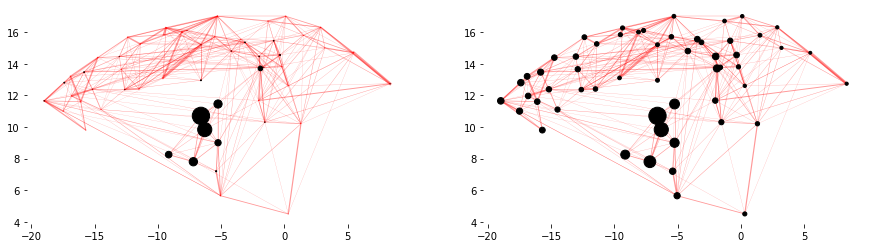

In [15]:
plot_weight_with_brain(w_SC, w_FC, area_id=4, name='Figures/6_Supp_FC_test')

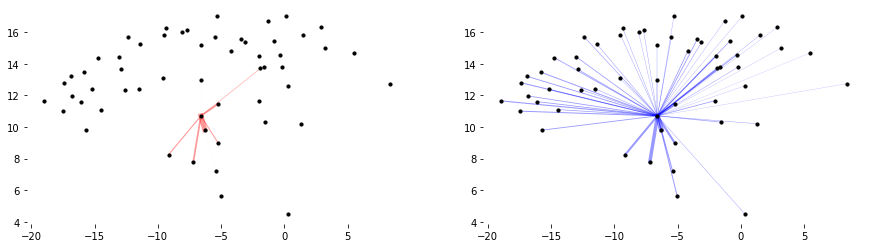

In [16]:
plot_weight_with_brain_ver2(w_SC, w_FC, area_id=4, name='Figures/6_Supp_FC_test')

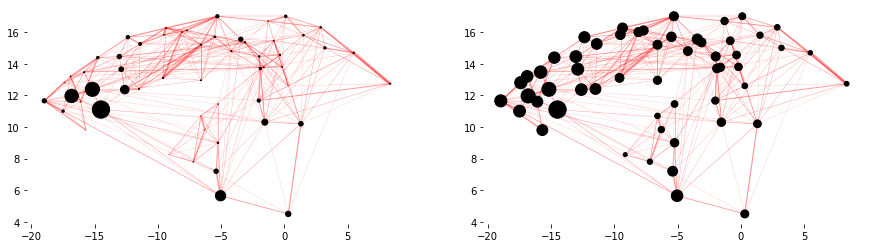

In [17]:
plot_weight_with_brain(w_SC, w_FC, area_id=15, name='Figures/6_Supp_FC_test')

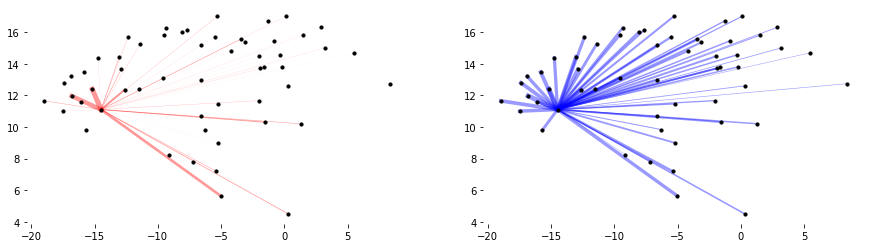

In [18]:
plot_weight_with_brain_ver2(w_SC, w_FC, area_id=15, name='Figures/6_Supp_FC_test')

In [19]:
w_FC[0]

array([0.        , 0.60077602, 0.2249008 , 0.19201685, 0.02704863,
       0.40792708, 0.29073069, 0.03490415, 0.22875615, 0.03645912,
       0.05955856, 0.04064993, 0.01090543, 0.11025532, 0.04683887,
       0.05536055, 0.13592901, 0.03526724, 0.03822229, 0.03217897,
       0.08196164, 0.1422037 , 0.04984205, 0.03400075, 0.0308001 ,
       0.04115038, 0.1225907 , 0.04001981, 0.12381003, 0.10876714,
       0.05768838, 0.07018378, 0.05454691, 0.03901484, 0.05917567,
       0.06230703, 0.08490556, 0.04139477, 0.04595395, 0.04137981,
       0.04126262, 0.06151805, 0.07865041, 0.03828902, 0.11081402,
       0.05673347, 0.03376486, 0.04365969, 0.04338834, 0.05315086,
       0.03629368, 0.01542201, 0.04275401, 0.05739236, 0.04477401])

In [20]:
data2plot = np.zeros([p['n_area'], 4])
data2plot[:, 0] = w_SC[4,:].copy()
data2plot[:, 1] = w_FC[4,:].copy()
data2plot[:, 2] = w_SC[15,:].copy()
data2plot[:, 3] = w_FC[15,:].copy()

In [21]:
np.savetxt("data_plot_SC_FC.csv", data2plot, delimiter = ",")

In [22]:
data2plot = np.zeros([p['n_area'], 4])
data2plot[:, 0] = w_SC[0,:].copy()
data2plot[:, 1] = w_FC[0,:].copy()
data2plot[:, 2] = w_SC[15,:].copy()
data2plot[:, 3] = w_FC[15,:].copy()

np.savetxt("data_plot_SC_FC_V2.csv", data2plot, delimiter = ",")

In [17]:
# data_resting_simu = np.load('Data/Marmoset_Model/r_exc_full.npy')
# FC_simu_full = np.corrcoef(data_resting_simu.T)

In [18]:
# fig, ax = plt.subplots(1,2,figsize=(30, 10))
# # tc.plot_func_connectivity(p, np.abs(FC_simu_full), fig, ax[0])
# tc.plot_func_connectivity(p, np.abs(FC_model), fig, ax[1])